## King County

The dataset contains data of house sales in King County US between May 2014 and May 2015.
King county is located in Washington, in the USA.

The aim of this project is to explore the dataset by creating visualizations and models to see what features of the houses played the biggest roles in their sale price.

Throughout this project I will refer to the sale price as 'price'.

#### Data exploration and cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

pd.set_option('display.max_columns', None)
%config InlineBackend.figure_format='retina'

In [2]:
housep = pd.read_csv('~/Desktop/kc_house_data.csv')

In [3]:
print(housep.shape)
housep.head(10)

(21613, 21)


id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   
5    101930     1.0           0     0          3     11        3890   
6      6819     2.0           0     0          3      7        1715   
7      9711     1.0           0     0          3      7        1060   
8      7470     1.0           0     0          3      7        1050   
9      6560     2.0           0     0          3      7        1890   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   
5           1530      2001             0    98053  47.6561 -122.005   
6              0      1995             0    98003  47.3097 -122.327   
7              0      1963             0    98198  47.4095 -122.315   
8            730      1960             0    98146  47.5123 -122.337   
9              0      2003             0    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  
6           2238        6819  
7           1650        9711  
8           1780        8113  
9           2390        7570

In [4]:
housep.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Now let's check if the data has null values

In [5]:
housep.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
housep[housep["price"] <= 0]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

In [7]:
housep[housep["sqft_lot"] < 0]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

Everything in the dataset seems to be good. We are lucky!

---

#### Variable exploration 

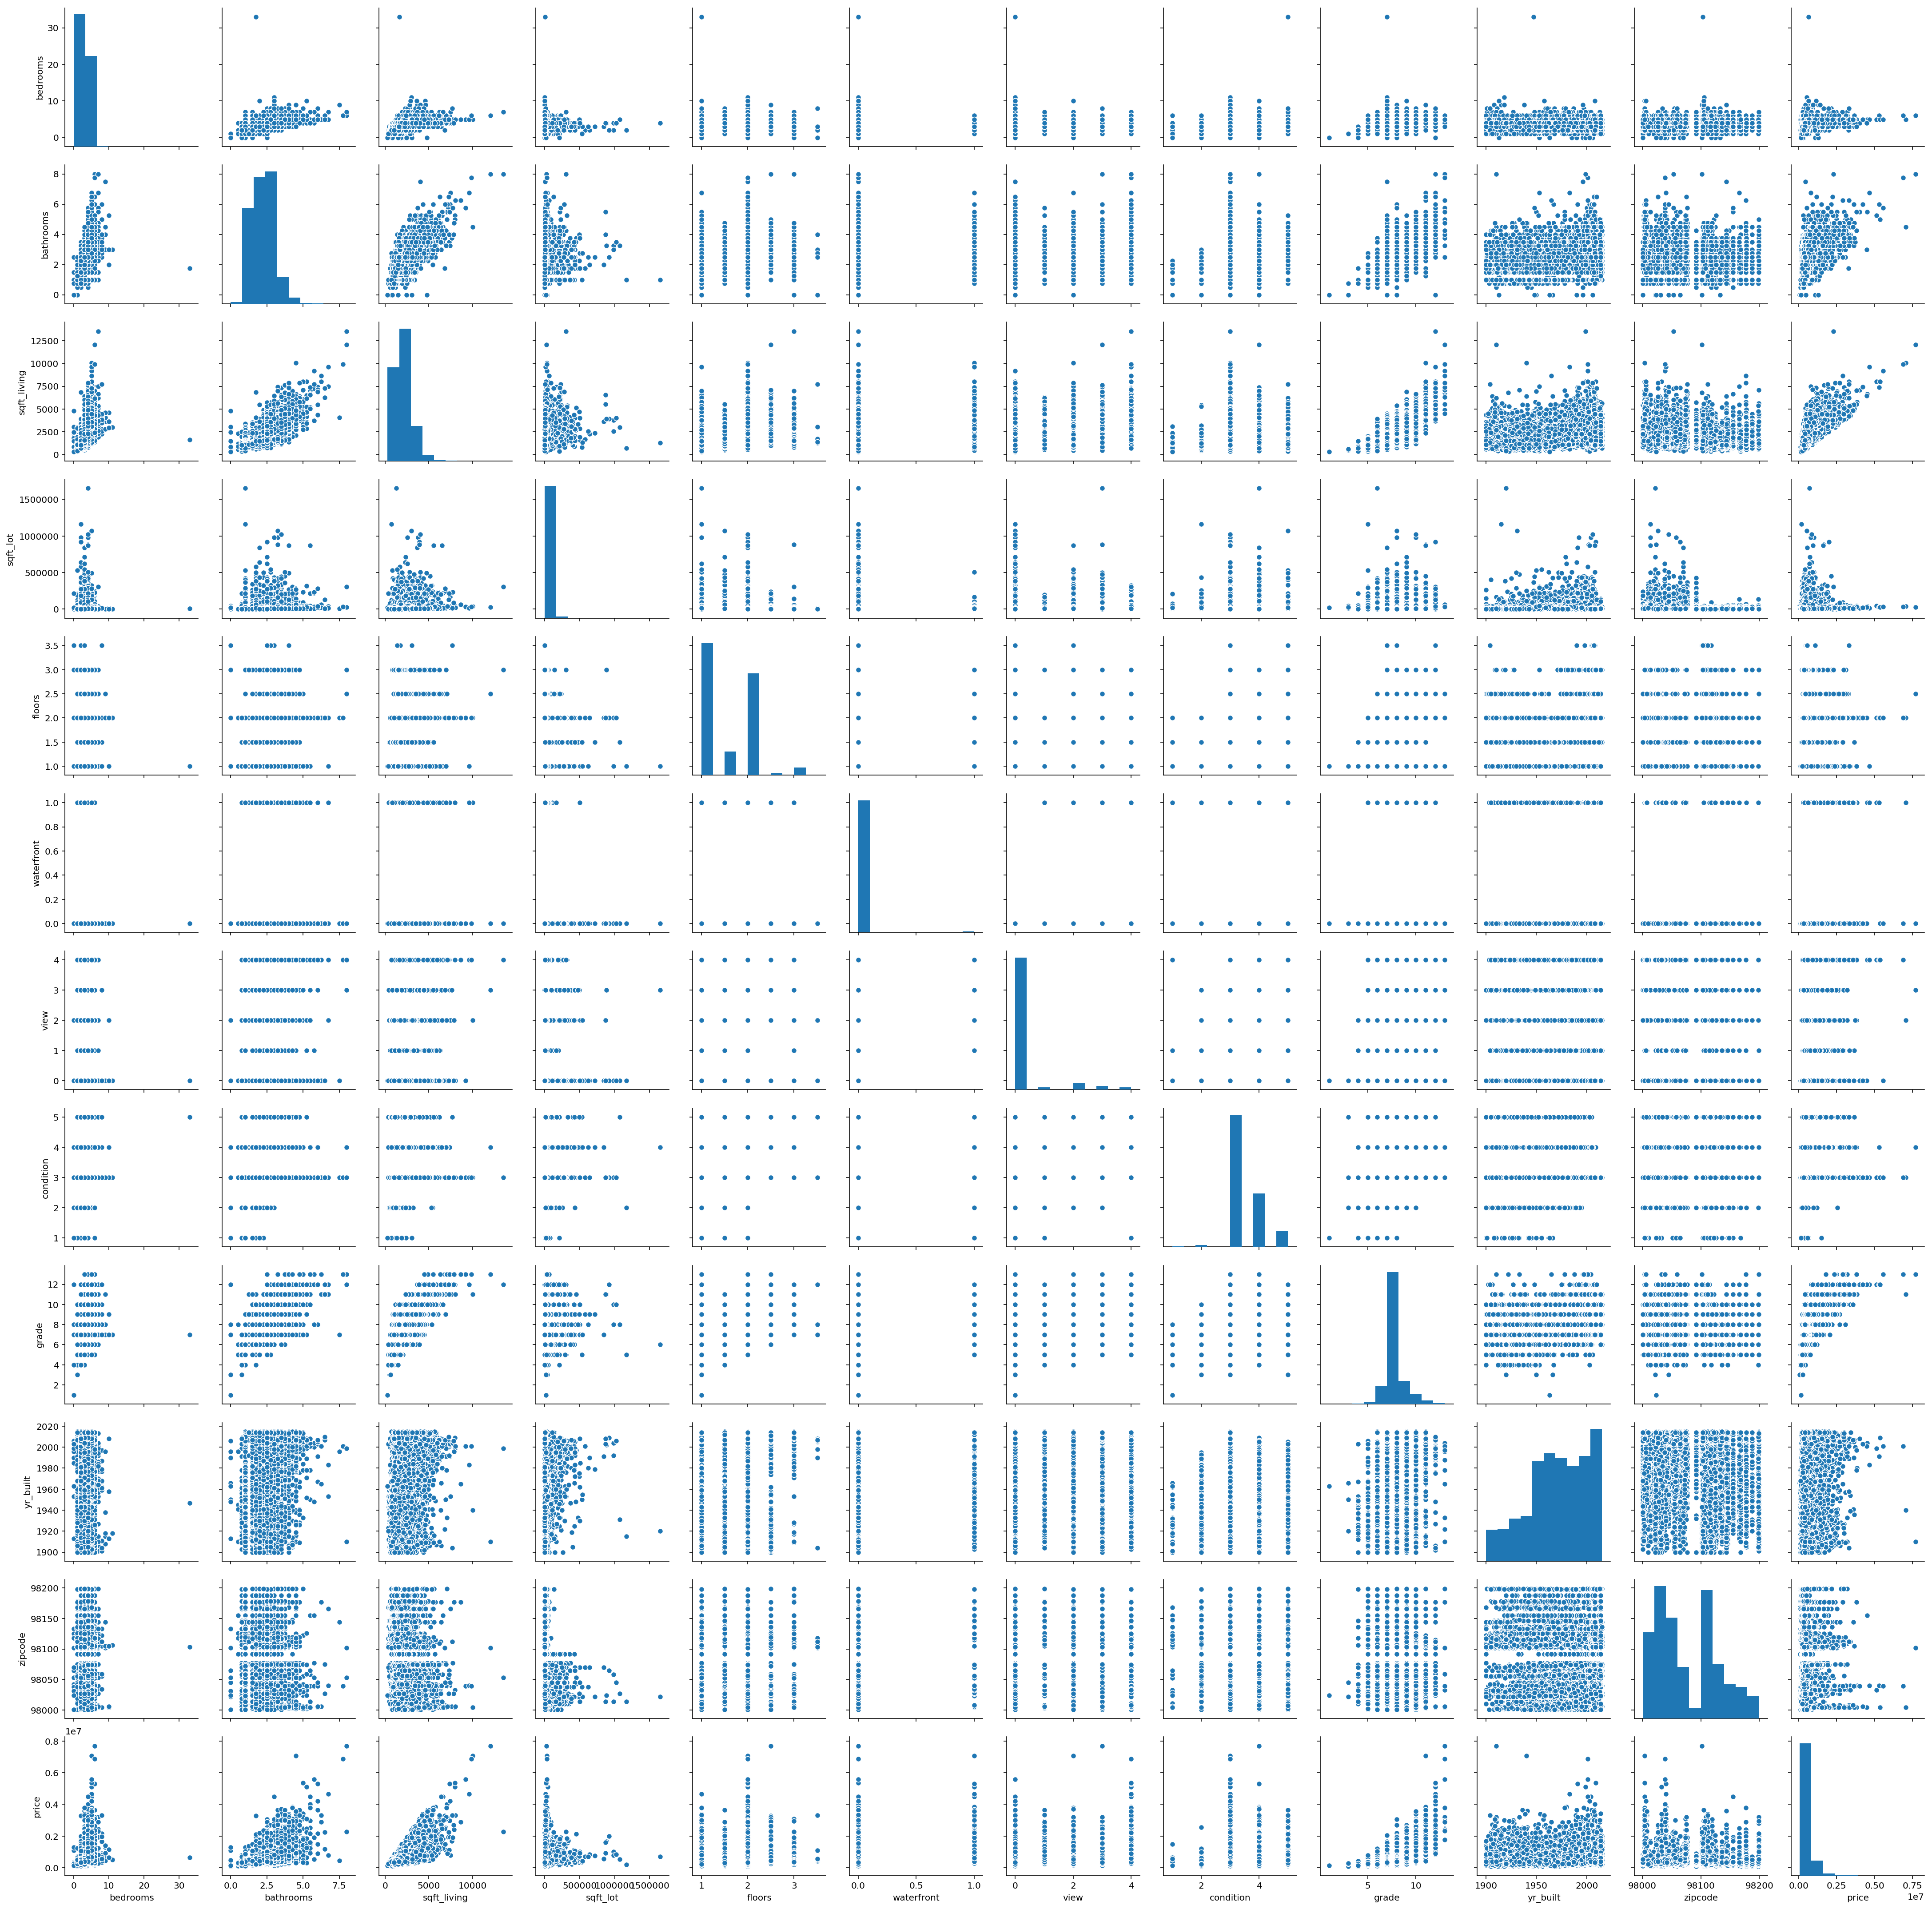

In [8]:
predictors = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','yr_built','zipcode']
target = ["price"]

sns.pairplot(housep[predictors + target])

plt.show()

There is too much going on in this pairplot to really get a good understanding of the different relationships that are at play.

#### Let's do some visualisation to inspect more specific relationships between variables and price.

What is the average and median price of a house?

In [9]:
print(housep.price.mean())
print(housep.price.median())

540088.1417665294
450000.0


The mean price of a house seems to be much higher than median, this indicates that there is no normal distribution. Let's visualise this.

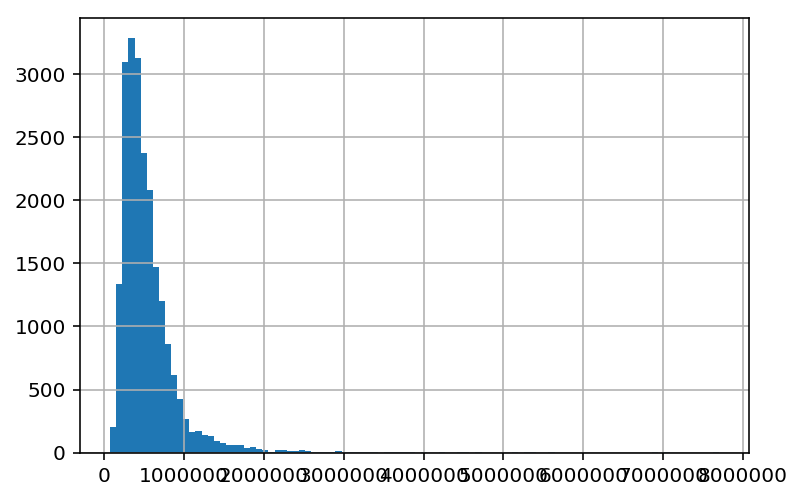

In [10]:
housep["price"].hist(bins=100);

This histogram shows us that the dataset is skewed to the right due to a few multimillion houses.
Furthermore, the vast majority of the sold houses fell under the 1 million dollar bar.

In [11]:
housep[housep.price>1000000].zipcode.value_counts().sum()

1465

Out of the 21613 houses in the dataset, 1465 sold for more than a million dollars. Let's have a look at the most expensive and cheapest houses in the dataset.

In [12]:
housep.sort_values('price', ascending=False).head(5)

id             date      price  bedrooms  bathrooms  \
7252  6762700020  20141013T000000  7700000.0         6       8.00   
3914  9808700762  20140611T000000  7062500.0         5       4.50   
9254  9208900037  20140919T000000  6885000.0         6       7.75   
4411  2470100110  20140804T000000  5570000.0         5       5.75   
1448  8907500070  20150413T000000  5350000.0         5       5.00   

      sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
7252        12050     27600     2.5           0     3          4     13   
3914        10040     37325     2.0           1     2          3     11   
9254         9890     31374     2.0           0     4          3     13   
4411         9200     35069     2.0           0     0          3     13   
1448         8000     23985     2.0           0     4          3     12   

      sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
7252        8570           3480      1910          1987    98102  47.6298   
3914        7680           2360      1940          2001    98004  47.6500   
9254        8860           1030      2001             0    98039  47.6305   
4411        6200           3000      2001             0    98039  47.6289   
1448        6720           1280      2009             0    98004  47.6232   

         long  sqft_living15  sqft_lot15  
7252 -122.323           3940        8800  
3914 -122.214           3930       25449  
9254 -122.240           4540       42730  
4411 -122.233           3560       24345  
1448 -122.220           4600       21750

In [13]:
housep.sort_values('price', ascending=False).tail(5)

id             date    price  bedrooms  bathrooms  sqft_living  \
8274   3883800011  20141105T000000  82000.0         3       1.00          860   
16198  3028200080  20150324T000000  81000.0         2       1.00          730   
465    8658300340  20140523T000000  80000.0         1       0.75          430   
15293    40000362  20140506T000000  78000.0         2       1.00          780   
1149   3421079032  20150217T000000  75000.0         1       0.00          670   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8274      10426     1.0           0     0          3      6         860   
16198      9975     1.0           0     0          1      5         730   
465        5050     1.0           0     0          2      4         430   
15293     16344     1.0           0     0          1      5         780   
1149      43377     1.0           0     0          3      3         670   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8274               0      1954             0    98146  47.4987 -122.341   
16198              0      1943             0    98168  47.4808 -122.315   
465                0      1912             0    98014  47.6499 -121.909   
15293              0      1942             0    98168  47.4739 -122.280   
1149               0      1966             0    98022  47.2638 -121.906   

       sqft_living15  sqft_lot15  
8274            1140       11250  
16198            860        9000  
465             1200        7500  
15293           1700       10387  
1149            1160       42882

### Let's plot the relation between price and the features of the house that would intuitively influence it the most.

##### Bedrooms
This is the distribution of houses and the amount of bedrooms they contain.

Text(0, 0.5, 'Count')

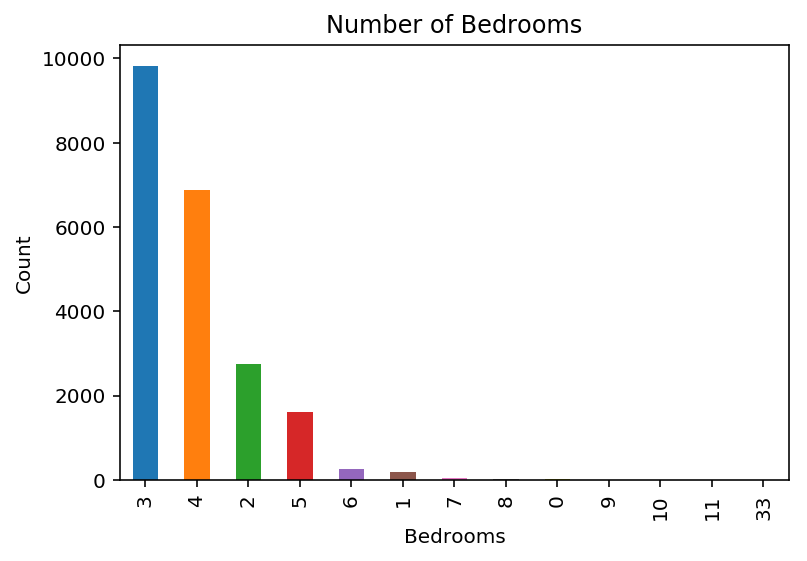

In [14]:
housep['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

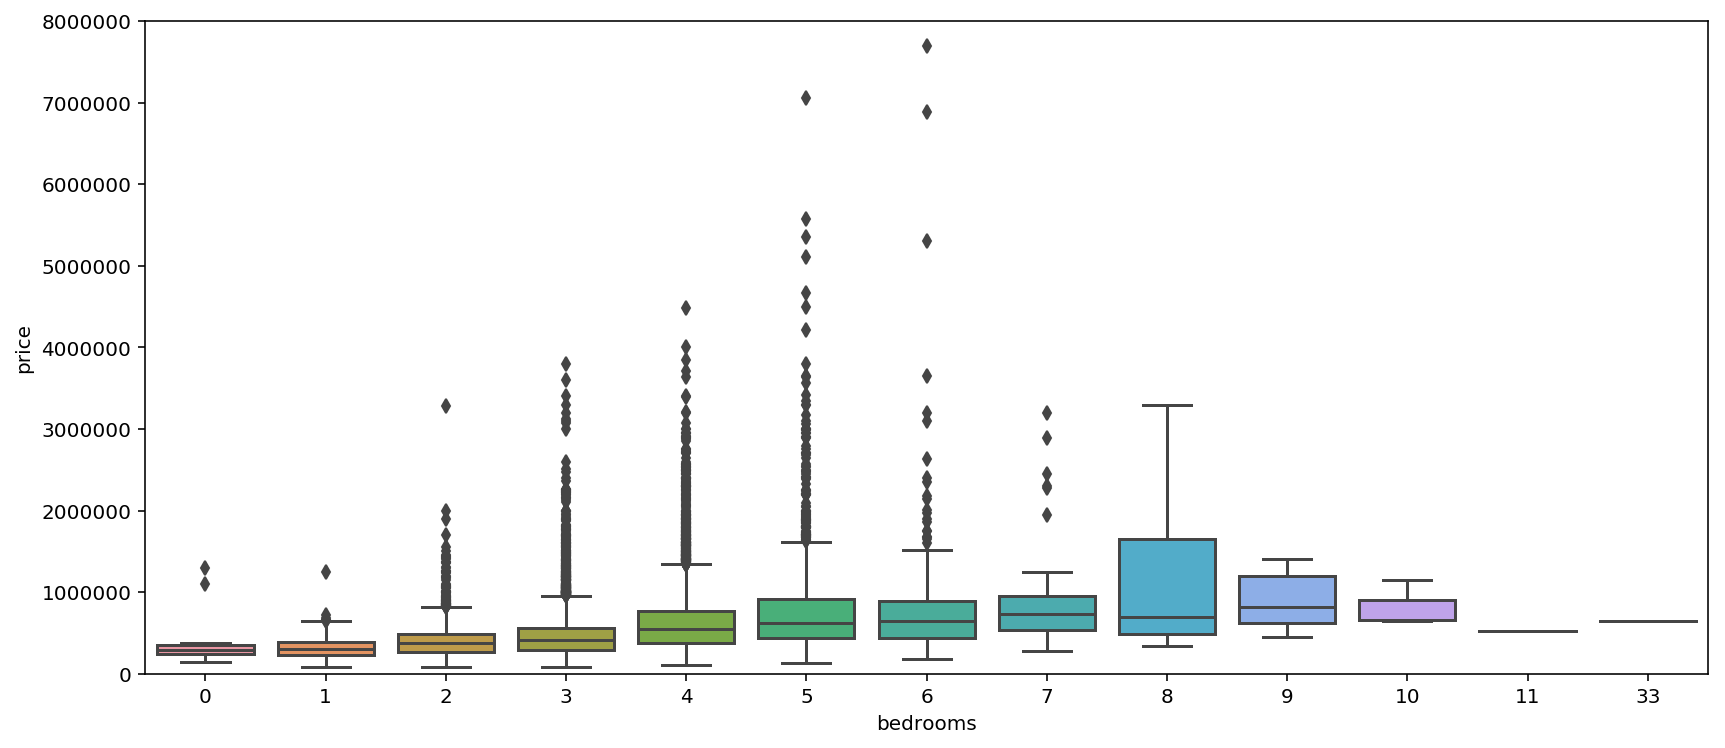

In [15]:
var = 'bedrooms'
data = pd.concat([housep['price'], housep[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

There seems to be a linear relationship between the amount of bedrooms and the price; as well as a considerable amount of outliers.

If we take price and bedroom outliers out of the equation we can get a much clearer view of the relationship between bedrooms and price.

(1, 15)

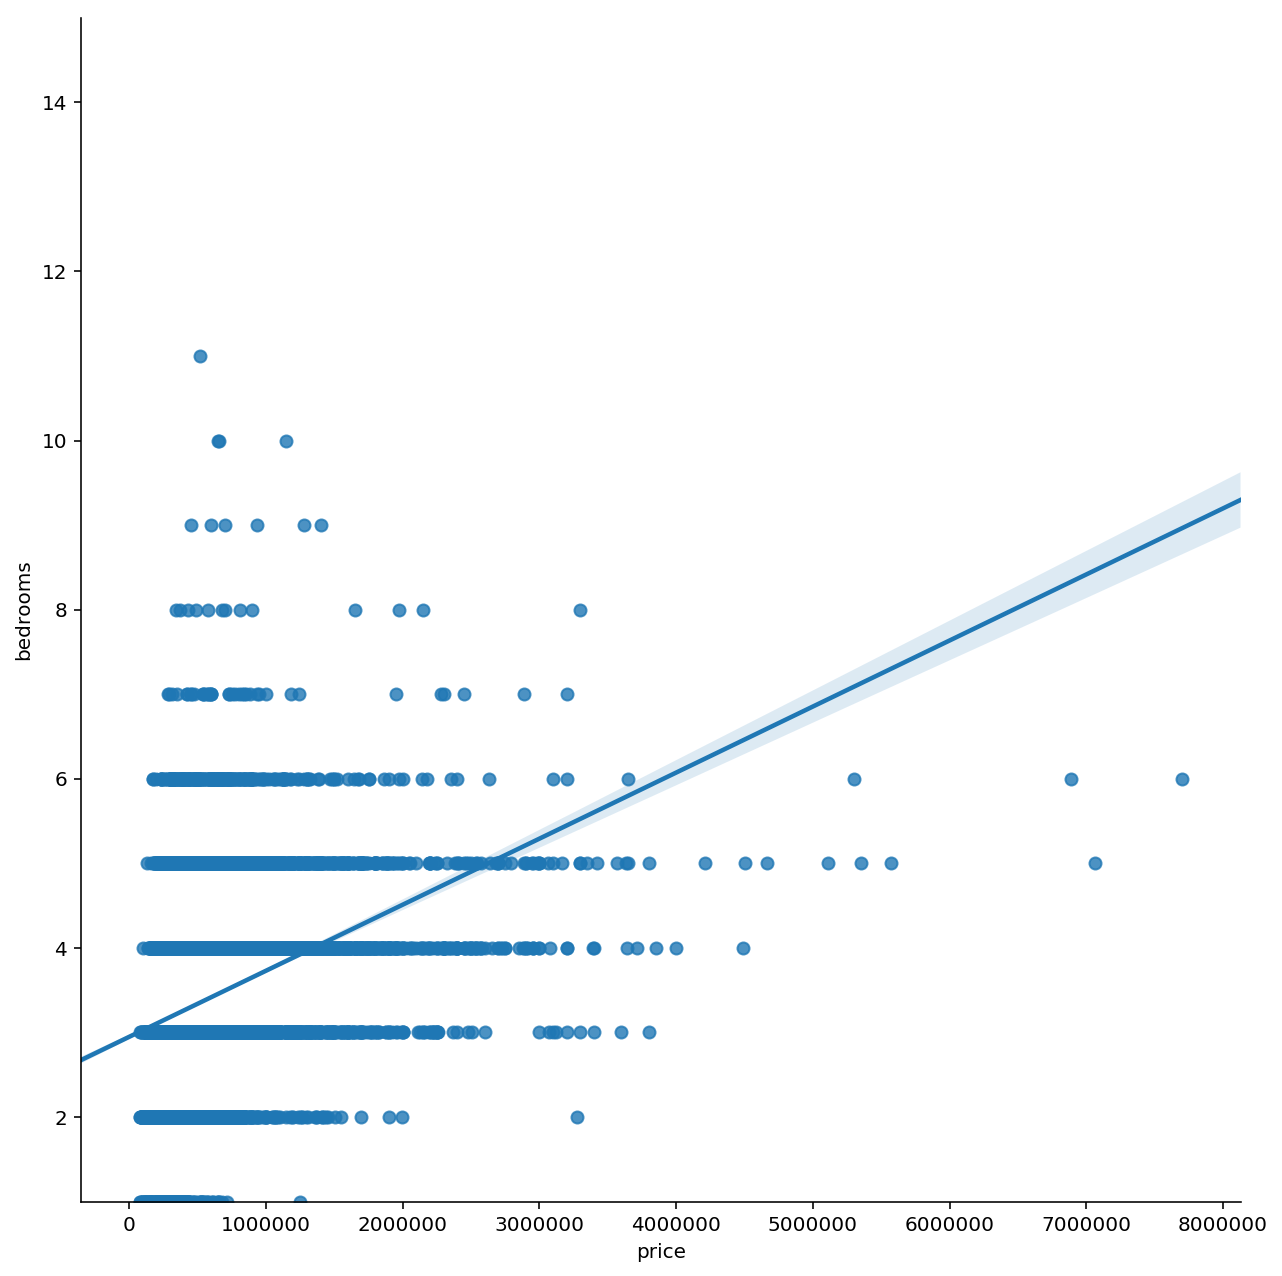

In [16]:
sns.lmplot(x="price", y='bedrooms', size=9, data=housep)
plt.ylim(1, 15)

##### Bathrooms

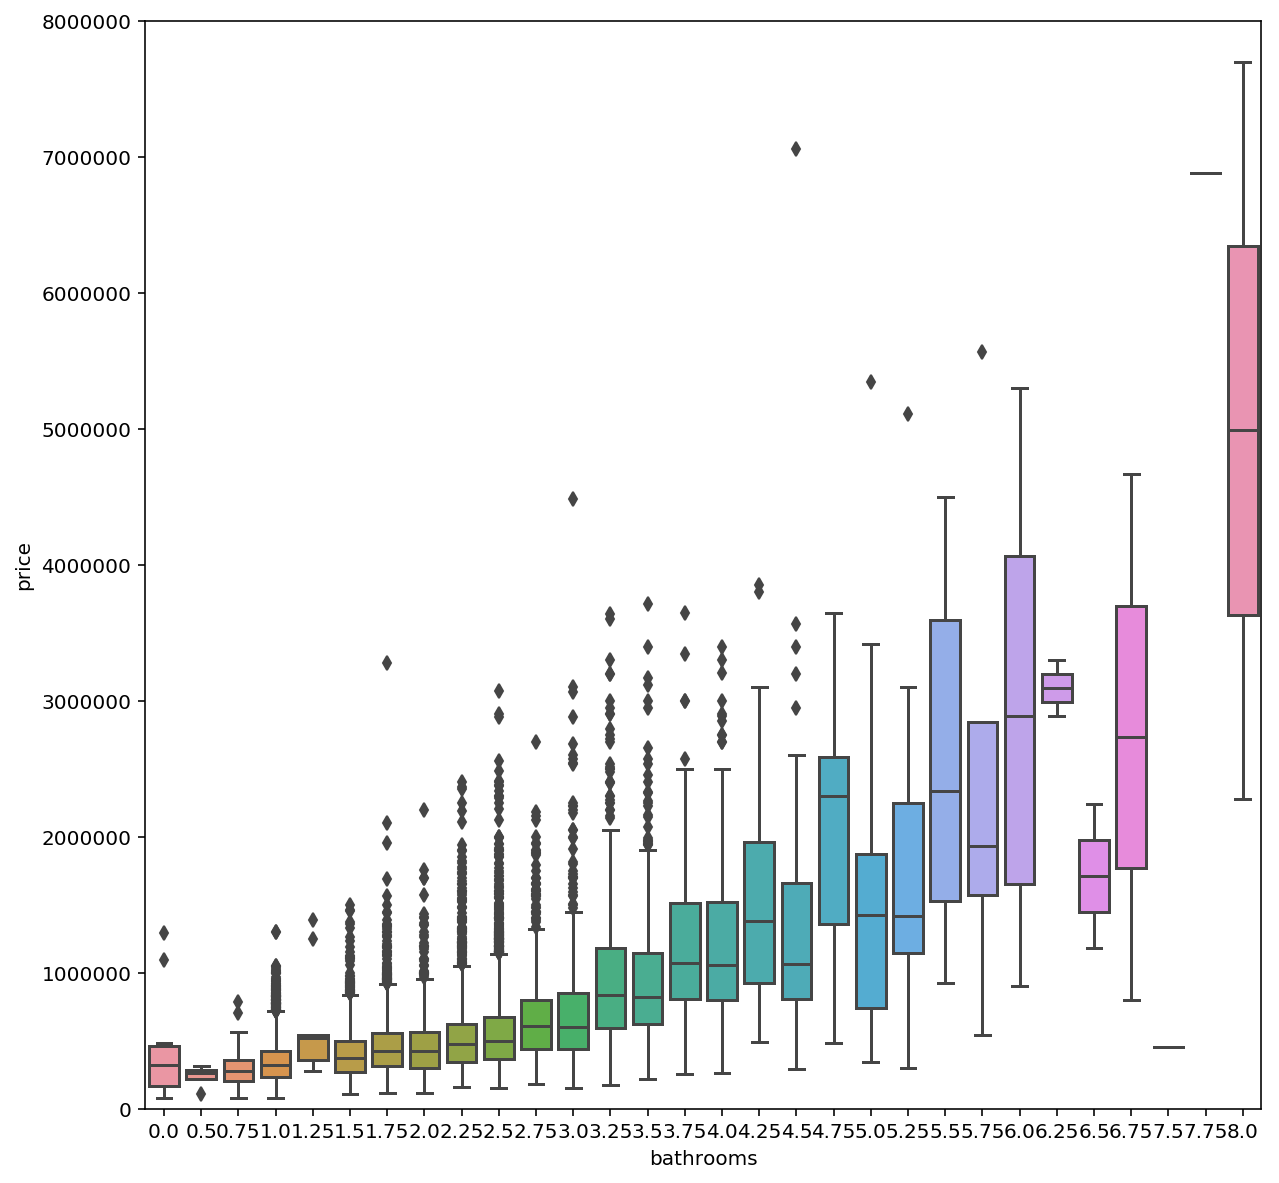

In [17]:
var = 'bathrooms'
data = pd.concat([housep['price'], housep[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

##### Square footage of the home

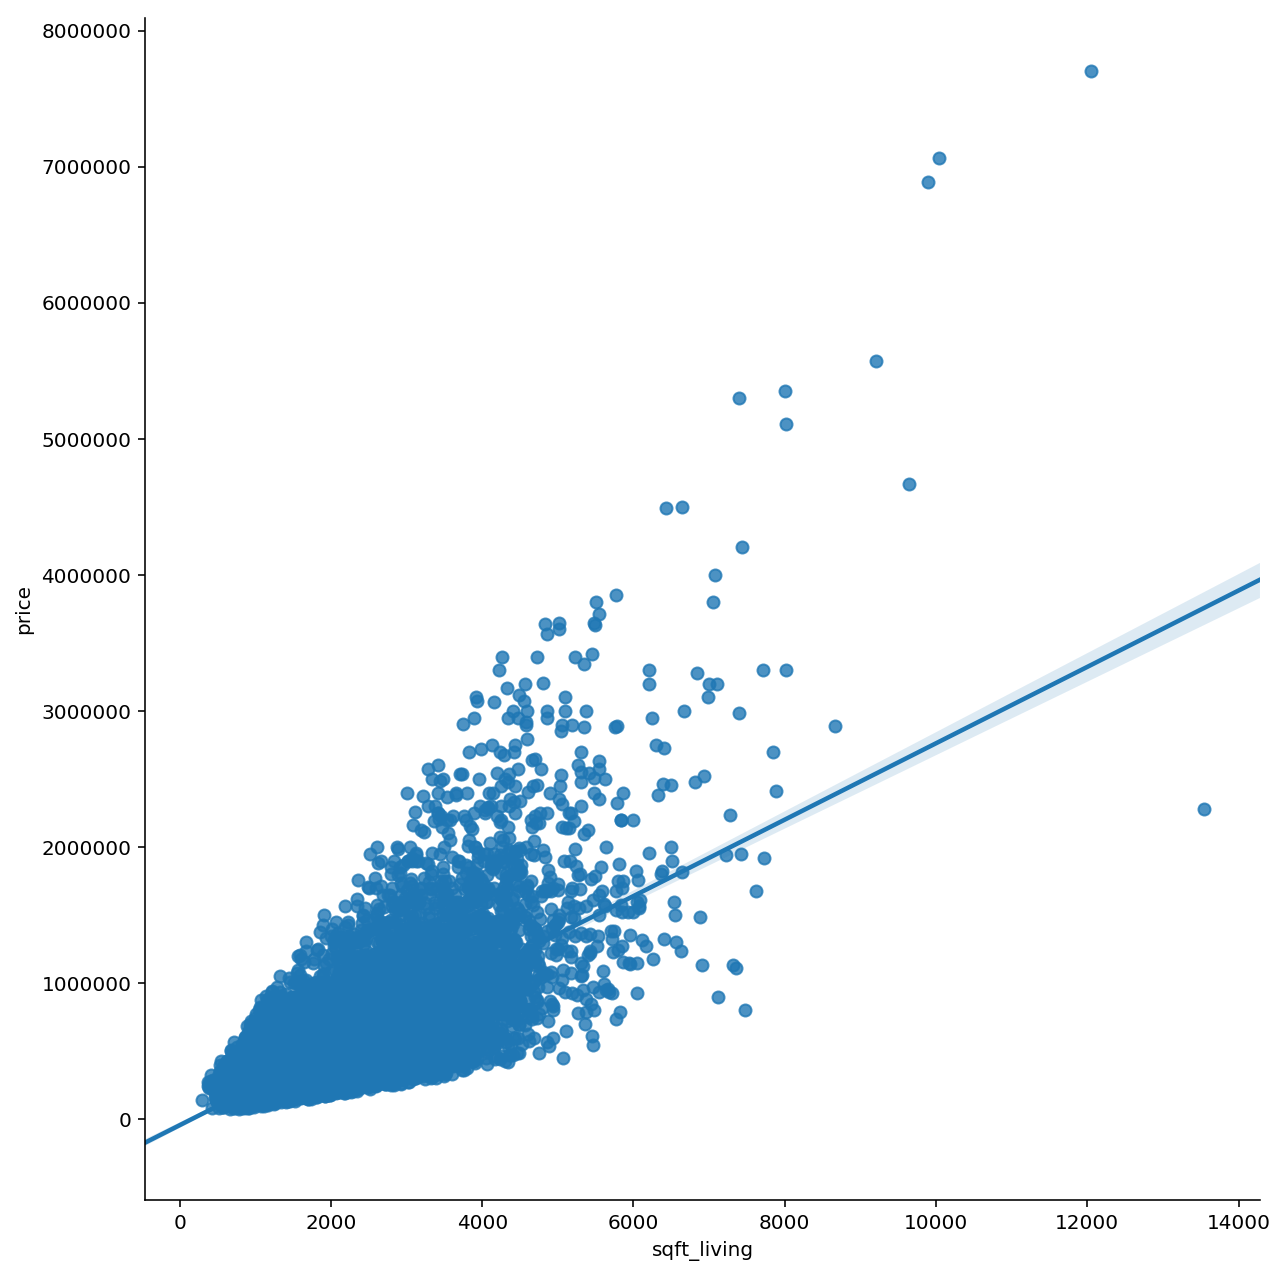

In [18]:
sns.lmplot(x="sqft_living", y='price', size=9, data=housep)

The size of the house also seems to heavily influence the price. 
How does the size of the house compared to the amount of bedrooms influence the price?

Text(0.5, 23.006874999999994, 'sqft_living')

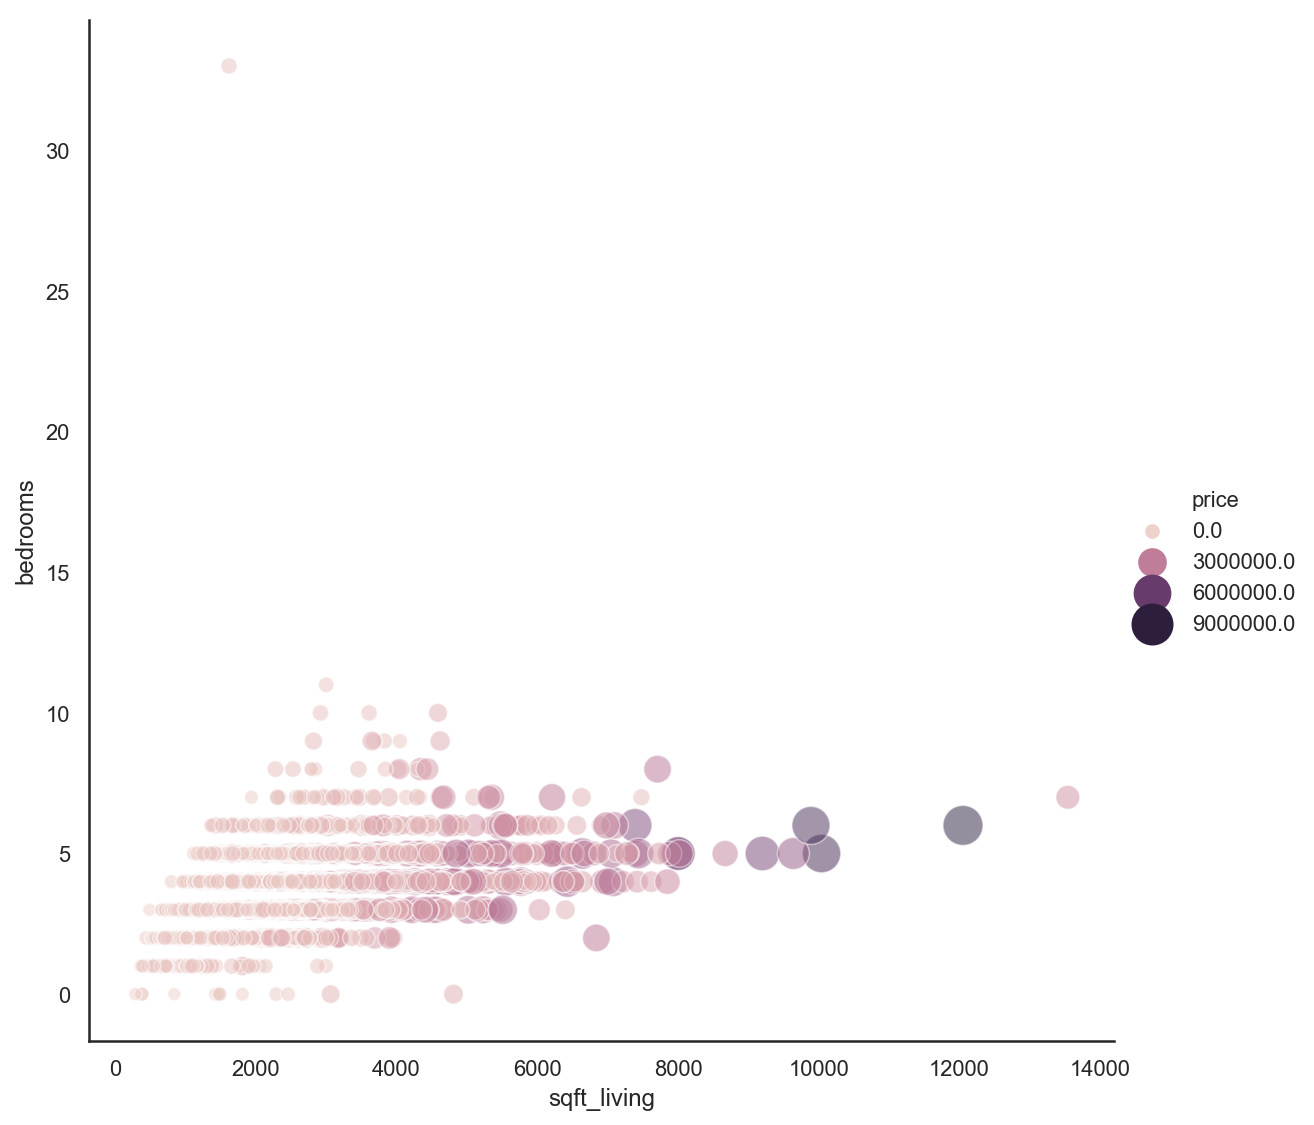

In [19]:
sns.set(style="white")
sns.relplot(x="sqft_living", y="bedrooms", size="price", hue="price", sizes=(40, 400), alpha=.5,height=8, data=housep)
plt.ylabel('bedrooms', fontsize=12)
plt.xlabel('sqft_living', fontsize=12)

##### Square footage of the whole lot


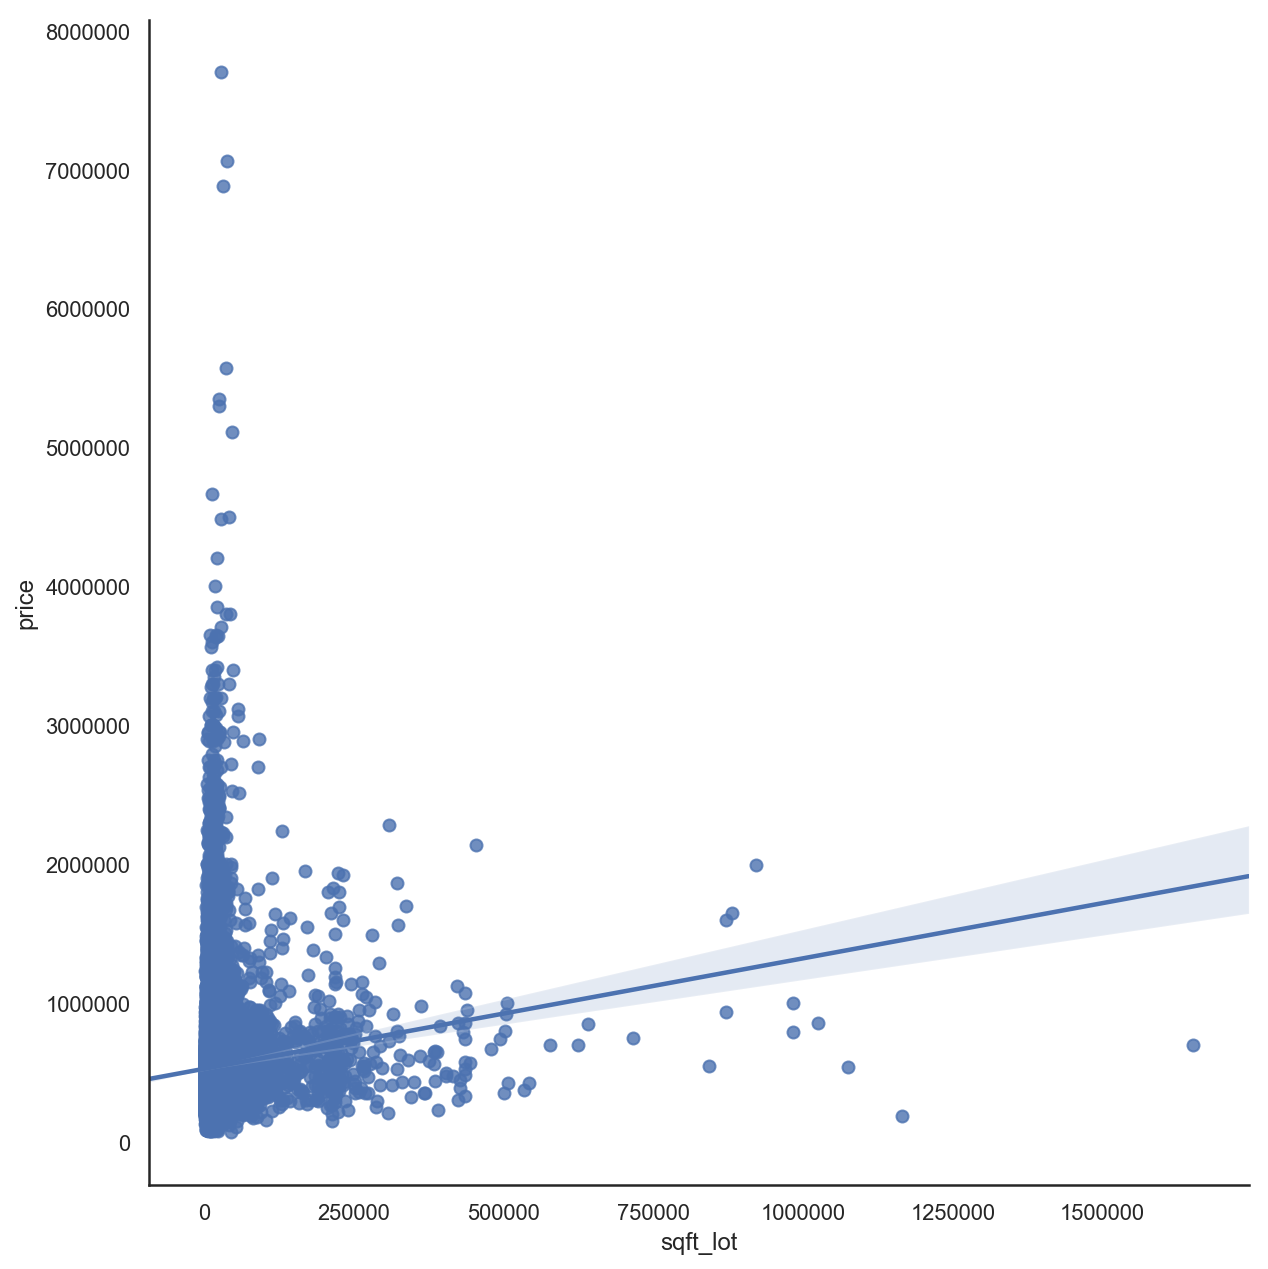

In [20]:
sns.lmplot(x="sqft_lot", y='price', size=9, data=housep)

Interesting, there seems to be no clear relationship between lot size and price.

##### Condition
How good the condition of the house is on scale of 1 to 5

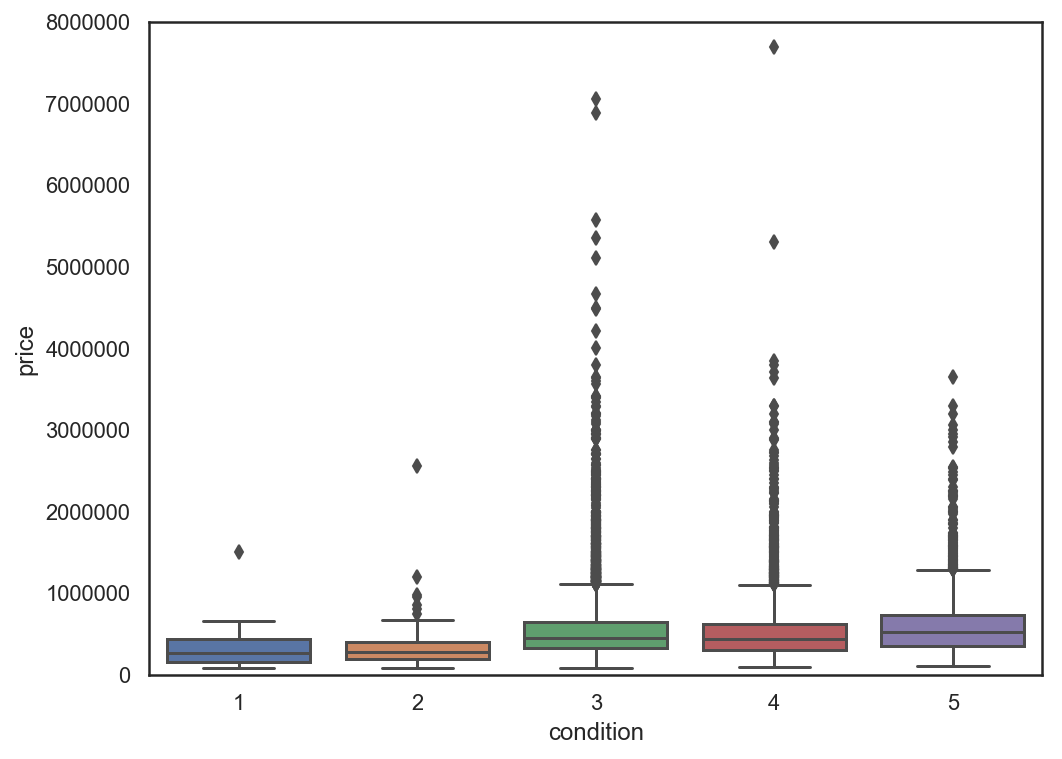

In [21]:
var = 'condition'
data = pd.concat([housep['price'], housep[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

##### Grade

All houses in the dataset have been classified based on a King County grading system from 1 to 13.


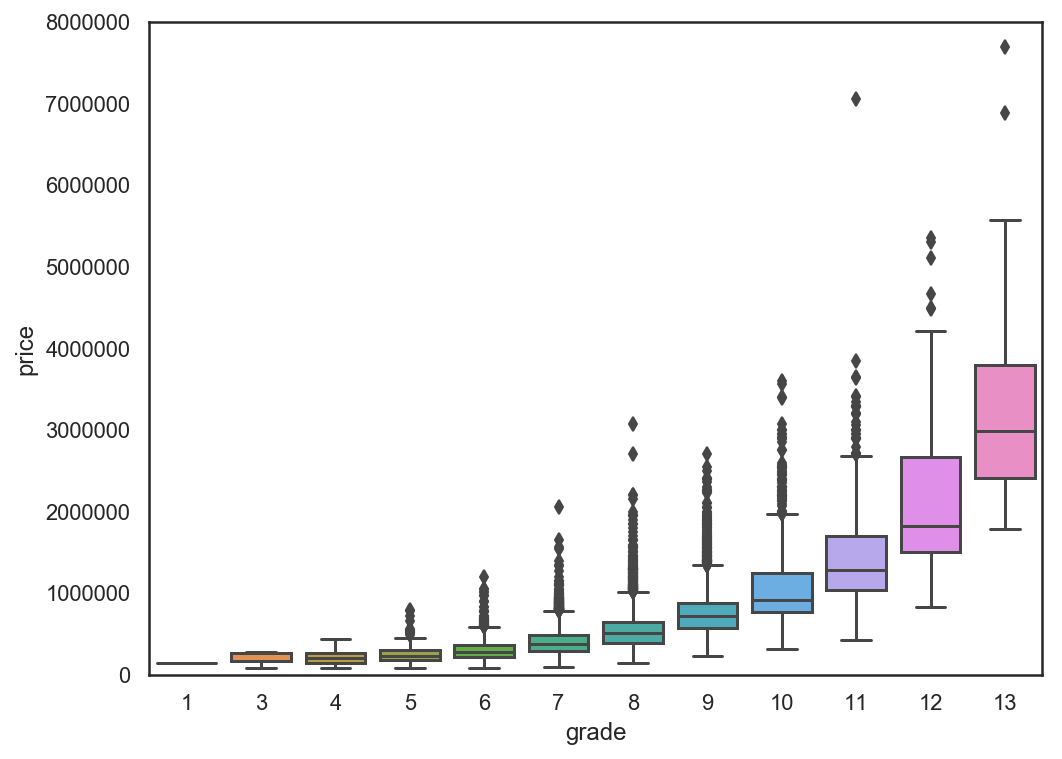

In [22]:
var = 'grade'
data = pd.concat([housep['price'], housep[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

##### Year a house was built

Let's visualise the price distribution of the houses based on the year they were built.

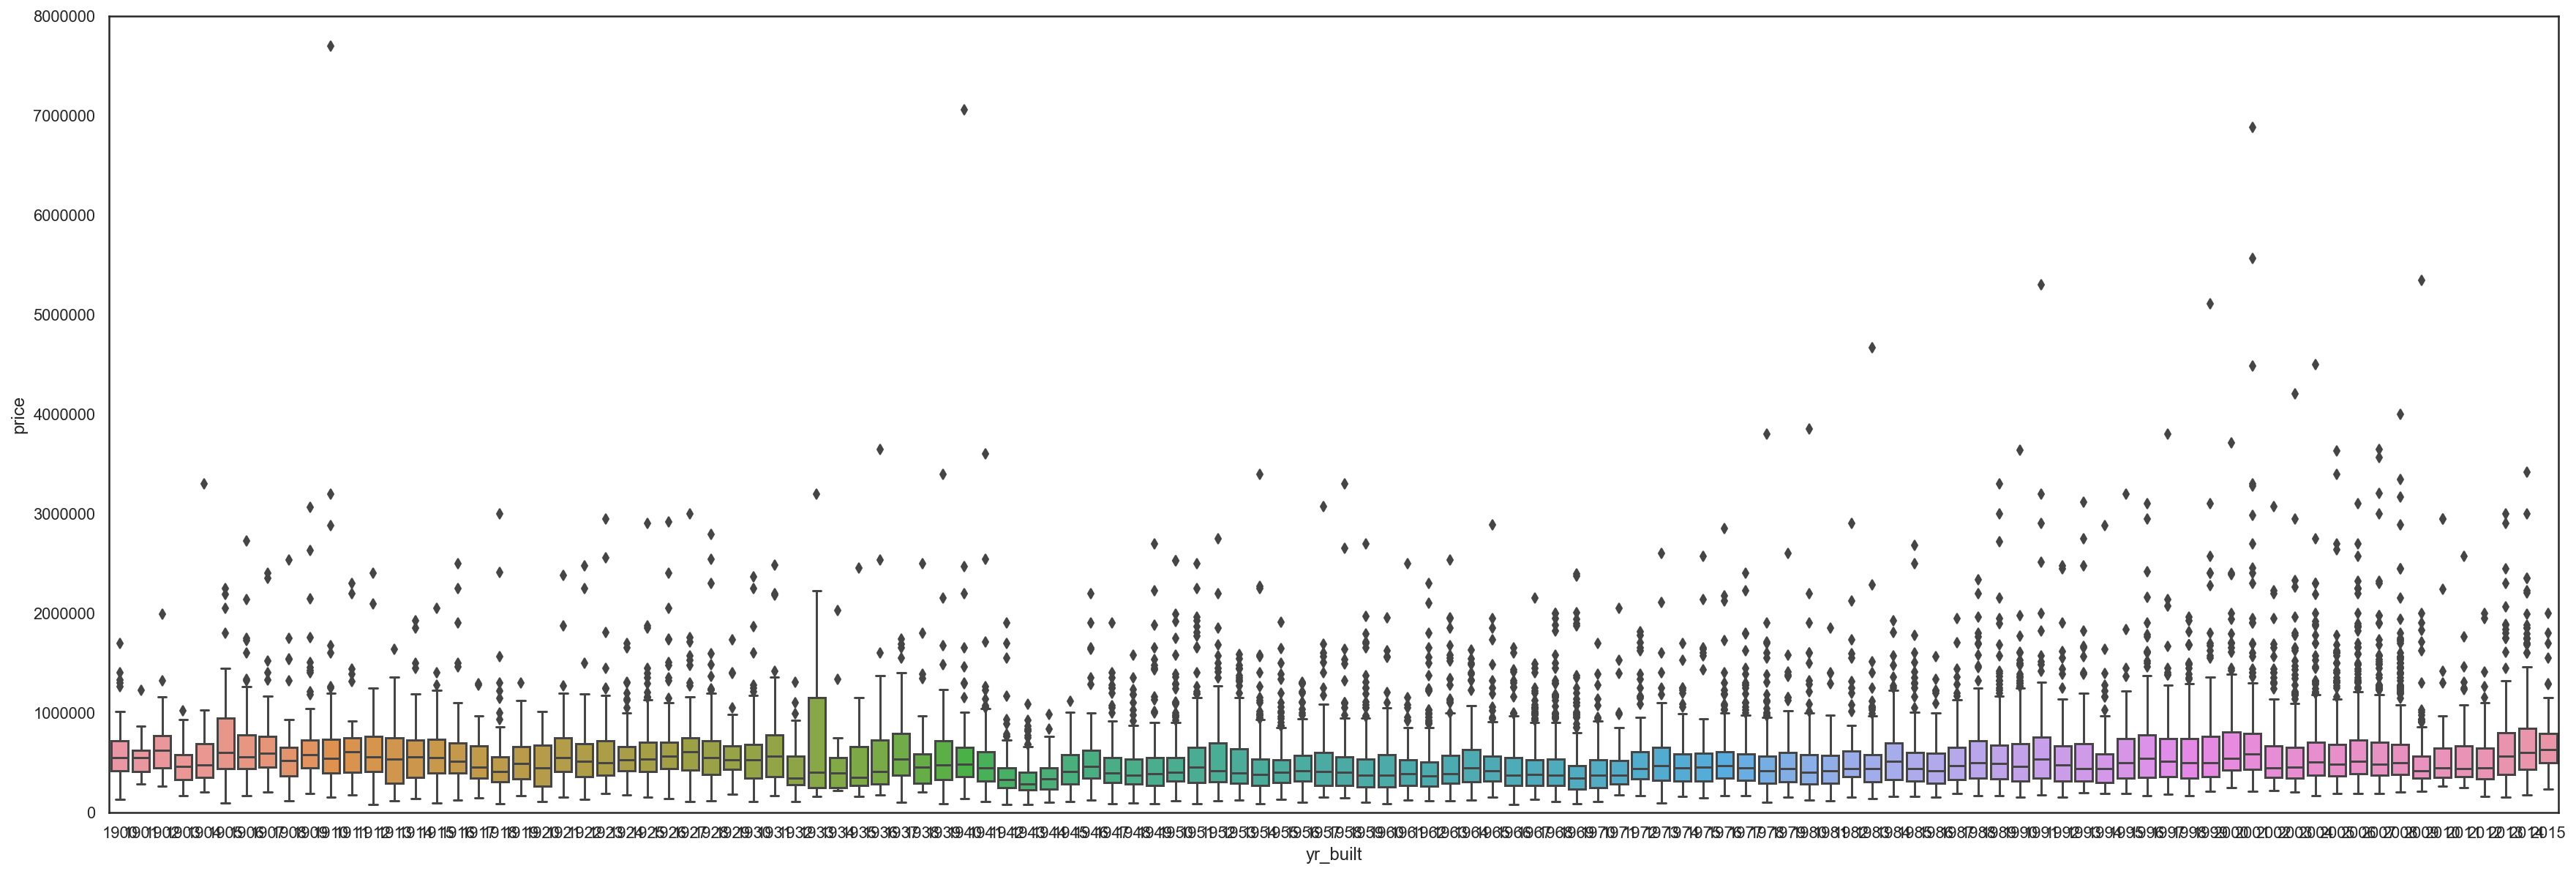

In [23]:
var = 'yr_built'
data = pd.concat([housep['price'], housep[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

This boxplot displays the median price and outliers of the houses from the oldest ones (built in 1900) up until 2015. Intuitively we would say a more recent house will be more expensive than an older one. However, looking at this boxplot that doesn't seem to be the case.

###### From these visualizations one can clearly tell that there is linear relationship between the amount of bedrooms, bathrooms and the grade of the house, as the price increases with the feature. 
However, when it comes to the lot size, condition and the year the house was built, there doesn't seem to be a clear link.

----

### Unusual features


How does the presence of a waterfront (usually associated with luxury) compare with the price?

##### Waterfront

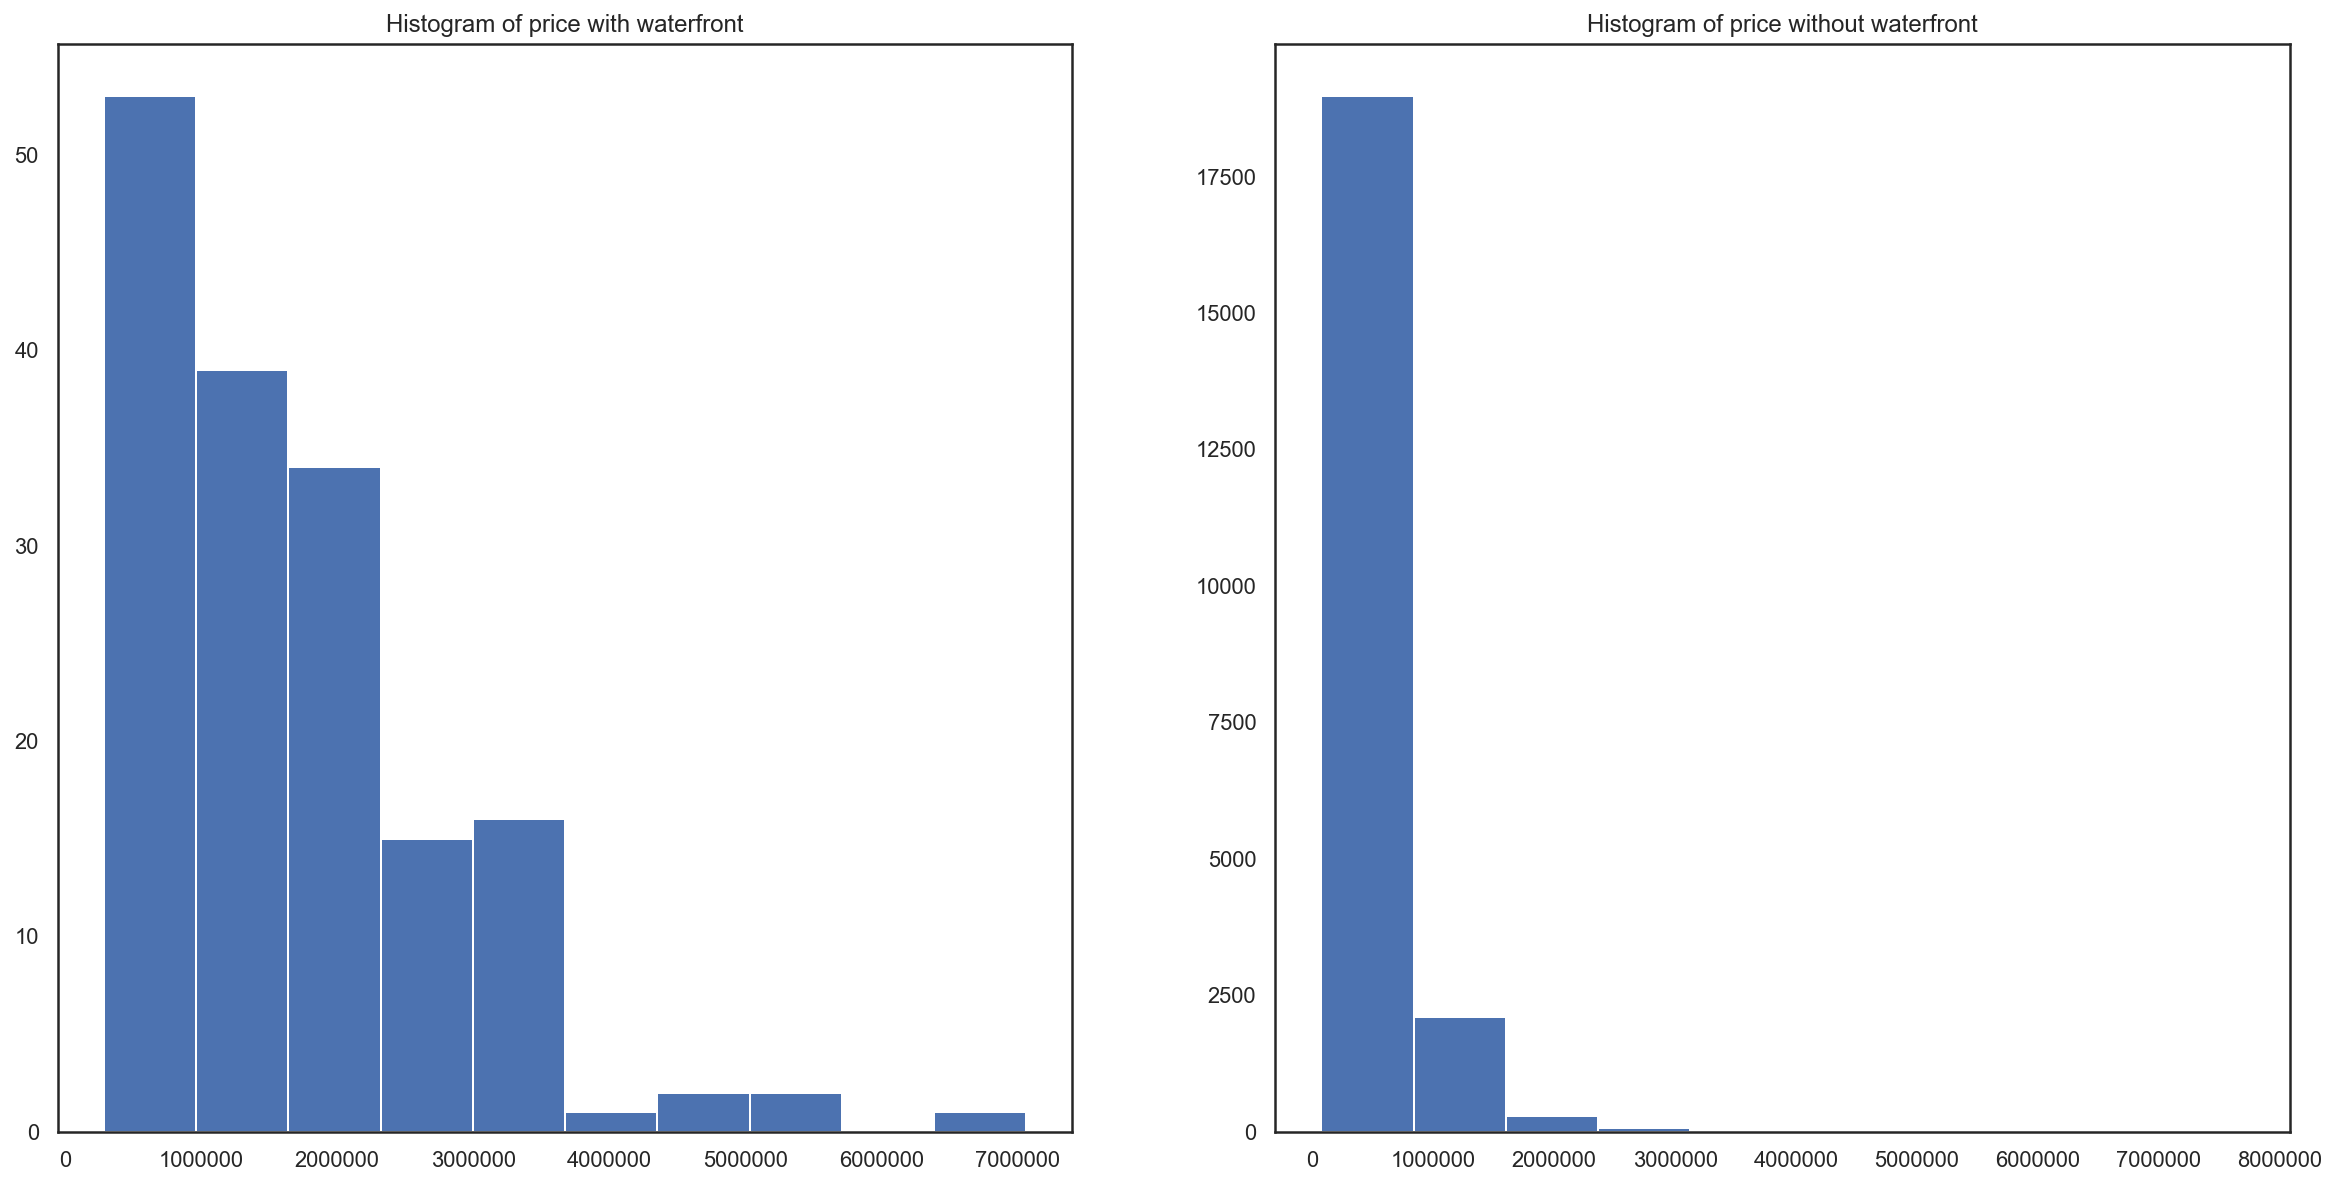

In [24]:
with_waterfront = housep.loc[housep["waterfront"] == 1, "price"]
without_waterfront = housep.loc[housep["waterfront"] == 0, "price"]

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].hist(with_waterfront)
ax[0].set_title("Histogram of price with waterfront")

ax[1].hist(without_waterfront)
ax[1].set_title("Histogram of price without waterfront")

plt.show()

According to these histograms, having a waterfront plays a major role regarding the price of the house.

---

### Geographic localization 
The neighborhood would intuitively play a major role in the price of house; let's find out.

This is a map of King County

In [25]:
import requests
from ipywidgets import Image

Image(value=requests.get('https://www.kingcounty.gov/about/region/~/media/about/maps/KC_simplemap_Oct2013.ashx').content)

Image(value=b'\xff\xd8\xff\xe1\x00\x18Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\…

This is the geographic distribution of the samples. Everything seems fine!

<Figure size 720x720 with 0 Axes>

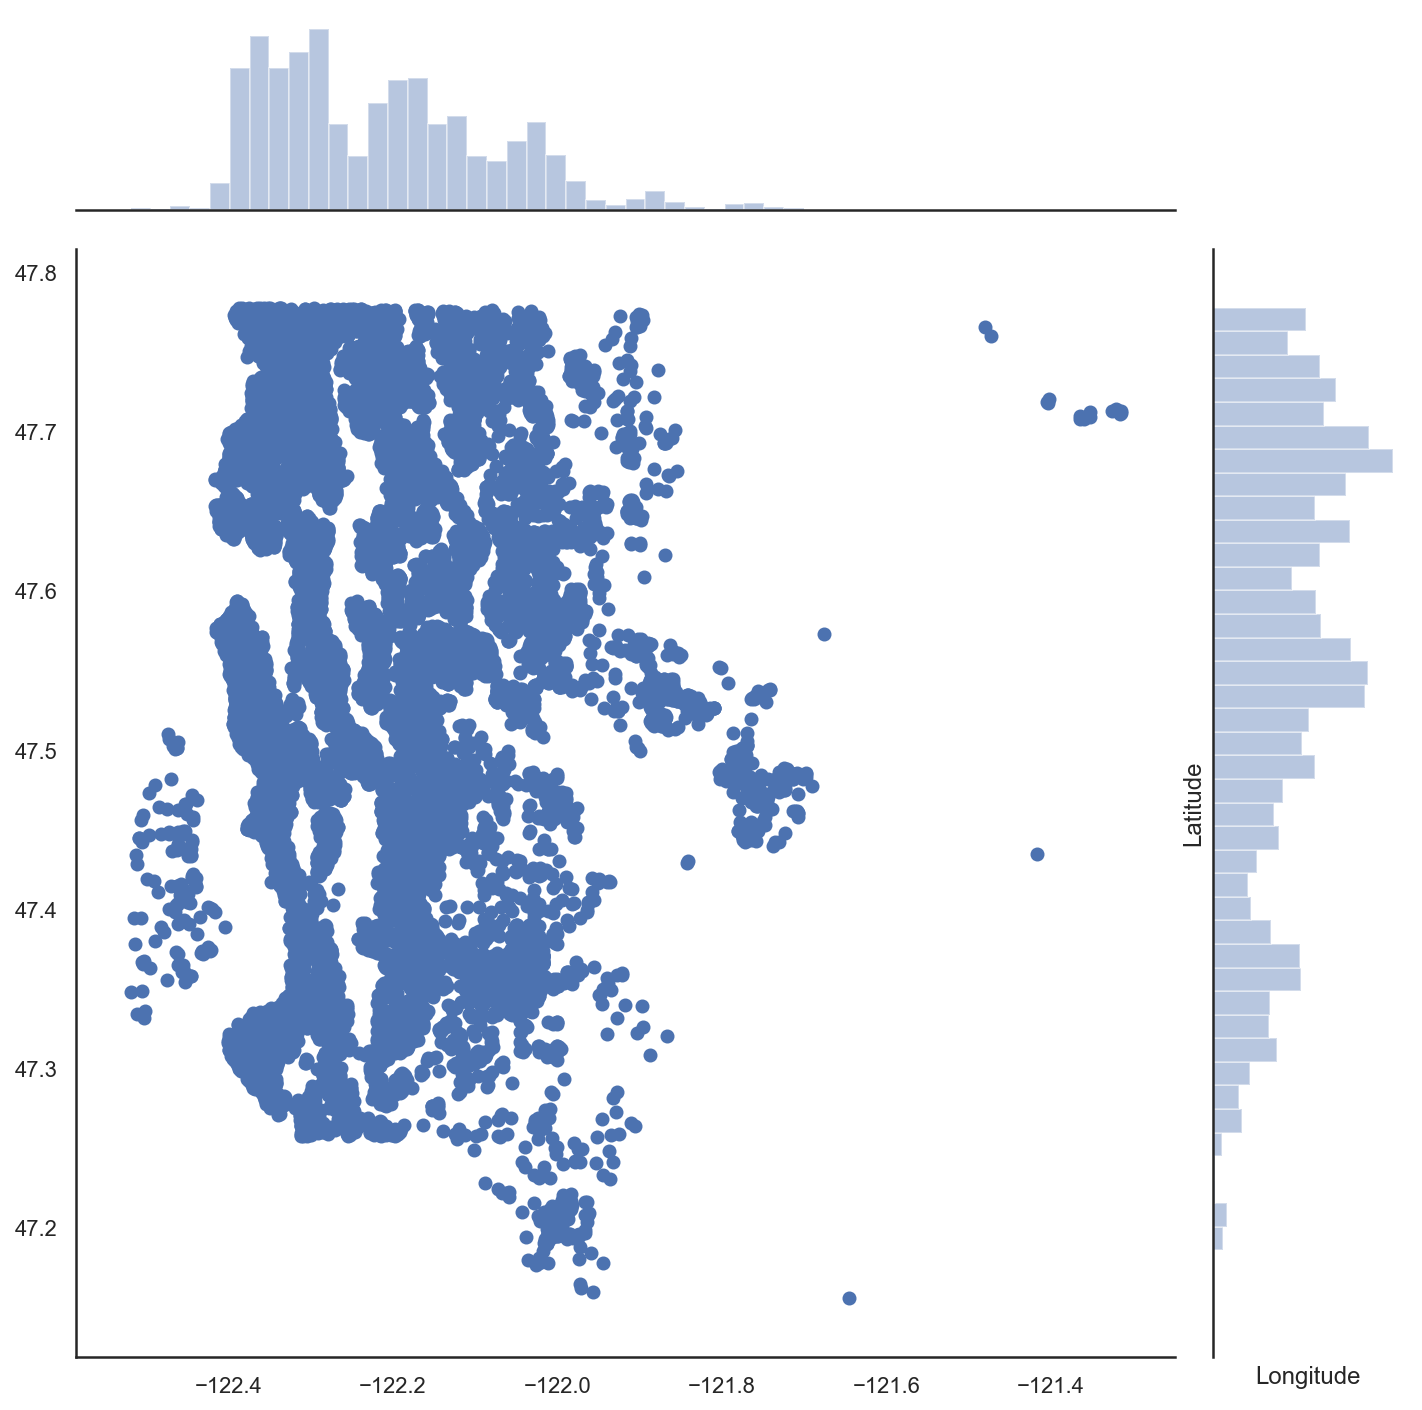

In [26]:
plt.figure(figsize=(10,10))
sns.jointplot(x=housep.long.values, y=housep.lat.values, size=10)
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.show()

As the feature grade seemed to have the most drastic effect on price here is a geographical representation of the houses. The color and size of each sample being influeced by the grade and price respectively.

Text(0.5, 22.959999999999972, 'Longitude')

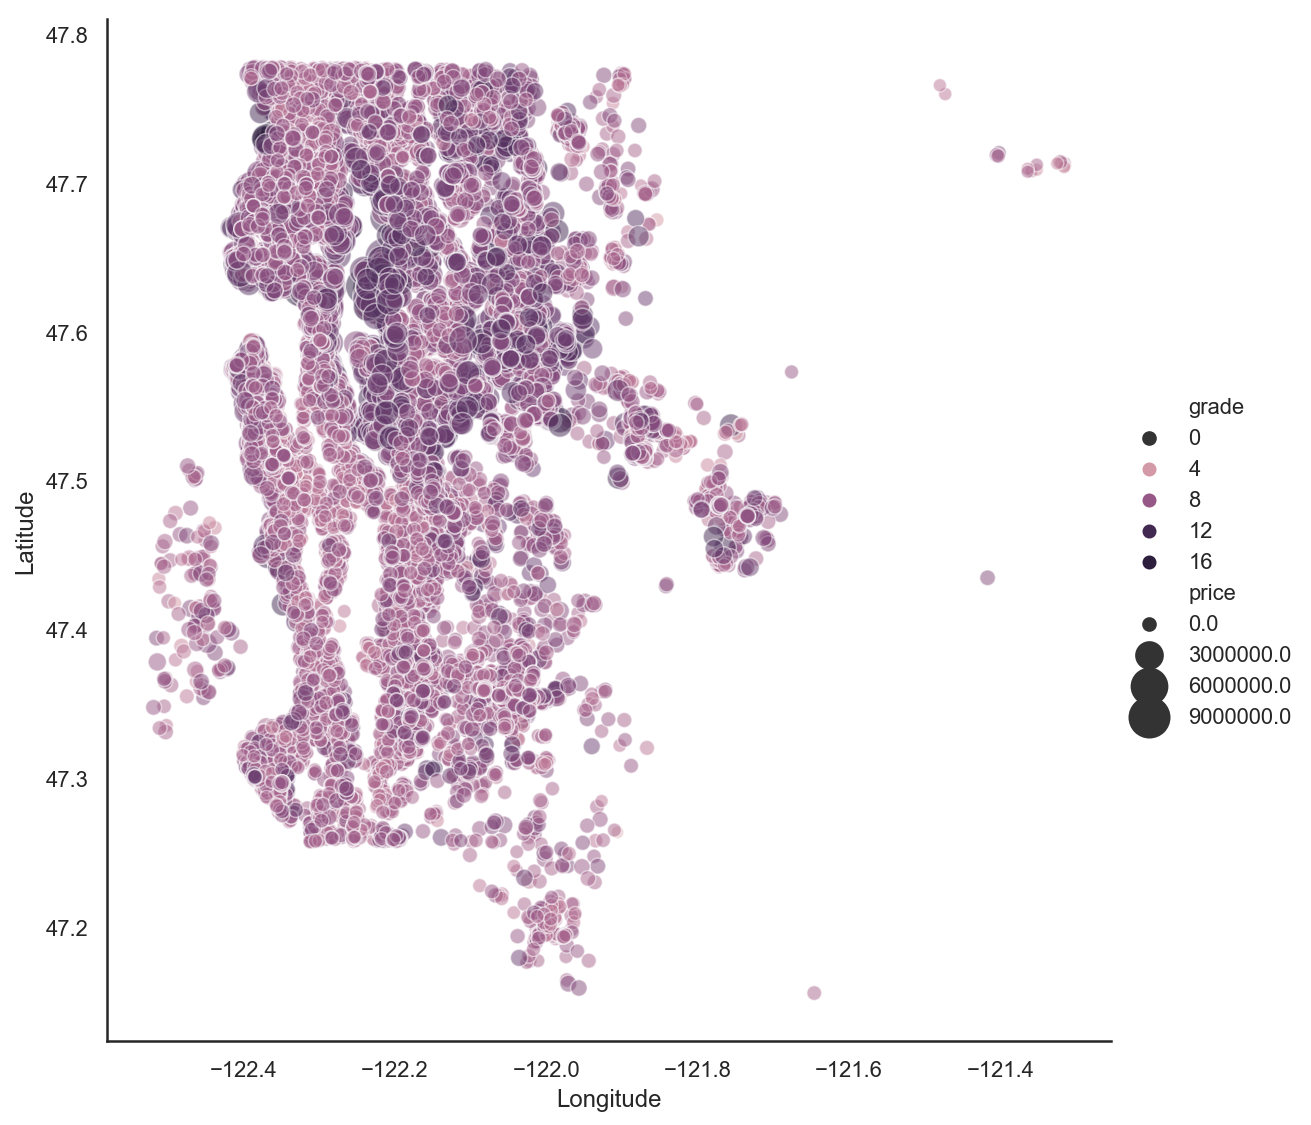

In [27]:
sns.set(style="white")
sns.relplot(x="long", y="lat", size="price", hue="grade", sizes=(40, 400), alpha=.5,height=8, data=housep)
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)

Looks good. Now let's dive deeper and figure out what zipcodes are the most sought after.

First let's see if the distribution of houses throughout the dataset is normal.


In [28]:
housep.zipcode.value_counts(10)

98103    0.027854
98038    0.027298
98115    0.026975
98052    0.026558
98117    0.025586
98042    0.025355
98034    0.025216
98118    0.023504
98023    0.023088
98006    0.023042
98133    0.022857
98059    0.021654
98058    0.021052
98155    0.020636
98074    0.020404
98033    0.019988
98027    0.019063
98125    0.018970
98056    0.018785
98053    0.018739
98001    0.016749
98075    0.016610
98126    0.016379
98092    0.016240
98144    0.015870
98106    0.015500
98116    0.015269
98029    0.014852
98004    0.014667
98199    0.014667
           ...   
98168    0.012446
98112    0.012446
98055    0.012400
98107    0.012307
98136    0.012169
98178    0.012122
98030    0.011845
98177    0.011798
98166    0.011752
98022    0.010827
98105    0.010595
98045    0.010225
98002    0.009207
98077    0.009161
98011    0.009022
98019    0.008791
98108    0.008606
98119    0.008513
98005    0.007773
98007    0.006524
98188    0.006293
98032    0.005784
98014    0.005737
98070    0.005460
98109    0

There are 70 different zipcodes in the dataset and the distribution of houses per zipcode seems to be healthy (there isn't one zipcode with half the dataset, which would have been problematic).

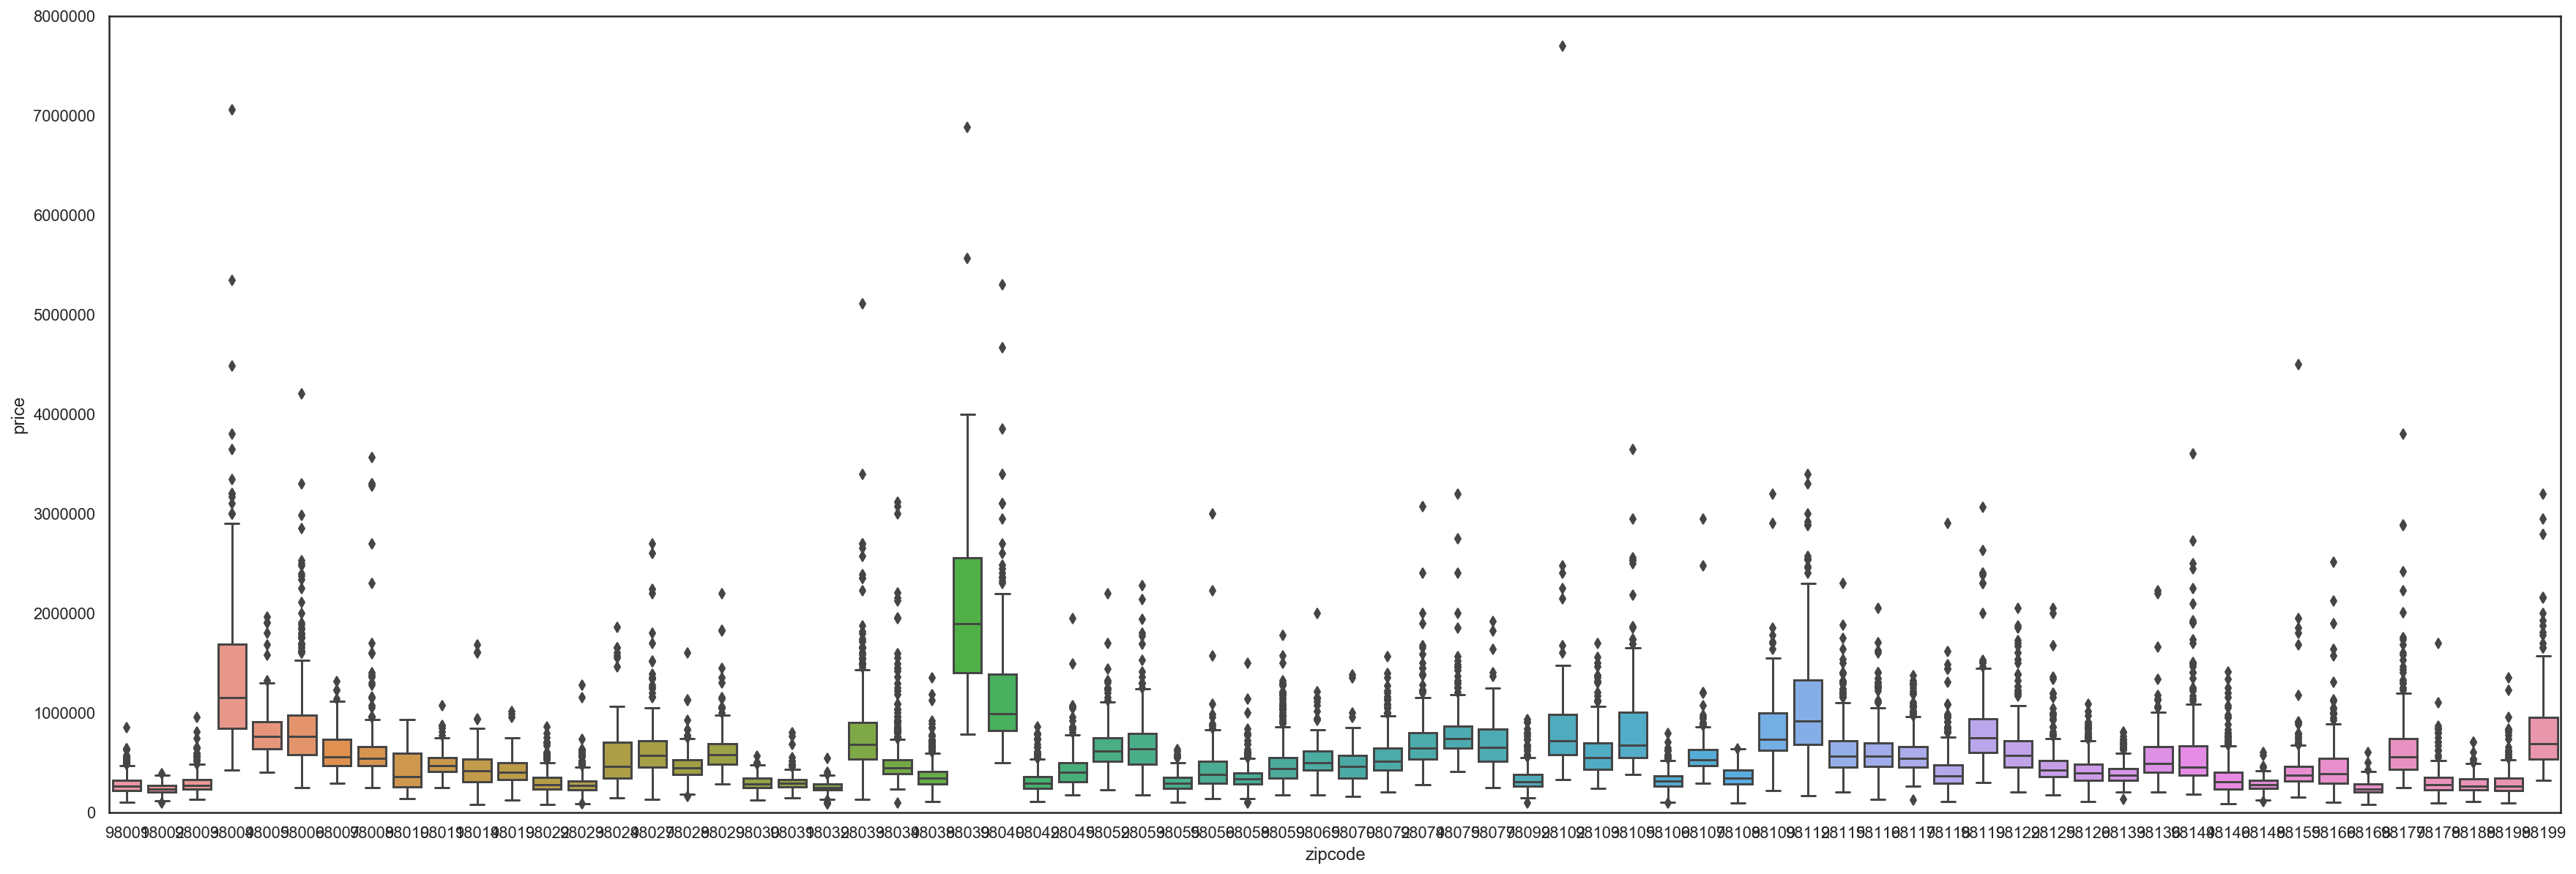

In [29]:
var = 'zipcode'
data = pd.concat([housep['price'], housep[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

This boxplot confirms the trend already observed on the colored map. There are pricier areas.

---

### Model Building

Ok, now let's get down to business. 

We will be using two methods to try and get the lowest RMSE possible.

Let's set the baseline.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = housep[predictors]
y = housep[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

15129 6484
15129 6484


In [50]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
y_pred = model.predict(X_test)

In order to set the baseline we will compute the mean price of the dataset.

In [52]:
y_pred_mean = [y_train.mean()] * len(y_test)

In [53]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mean)))

MAE: 143396.43405021203
MSE: 50408661109.44472
RMSE: 380043.56780973694


This is our baseline RMSE, let's try and beat that.

I have decided to include only the colums that seemed the most relevant and that weren't redundant with other features (e.g. sqft_living15 as it shows the square feet after renovation which is too highly correlated with sqft_living) as can be seen in the confusion matrix below.

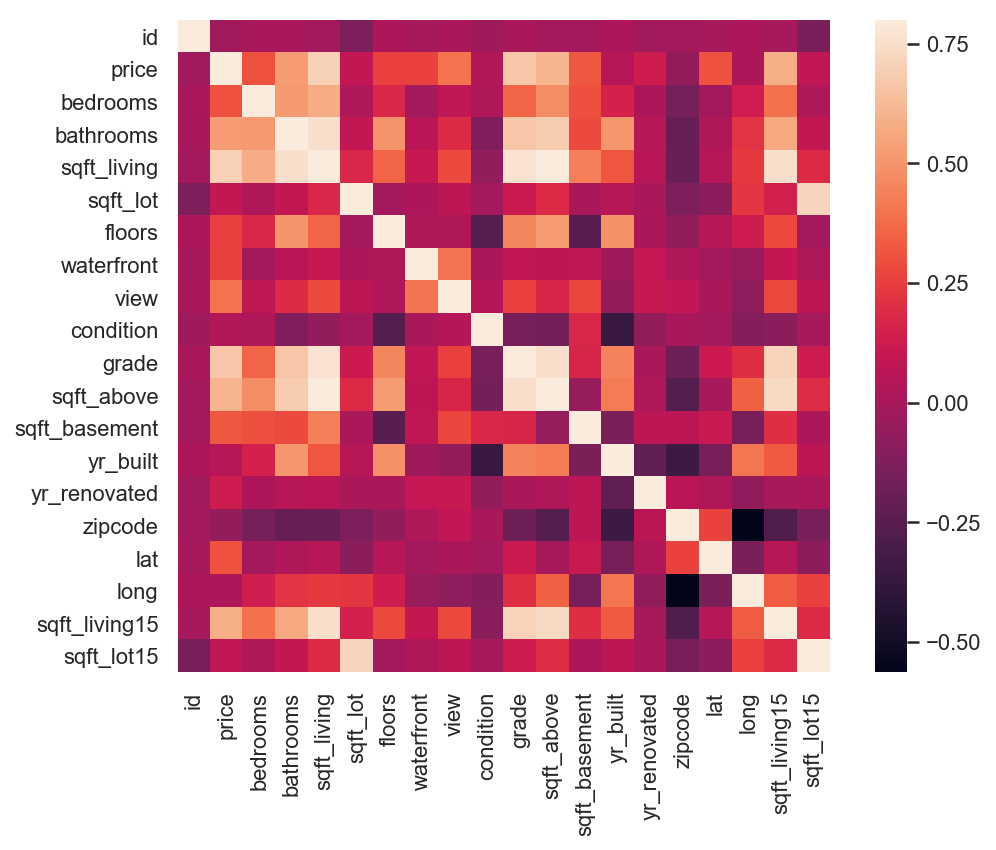

In [54]:
corrmat = housep.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, vmax=.8, square=True);

#### Method I: Linear Regression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [56]:
y = housep['price']

In [57]:
X = housep[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','yr_built','zipcode']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
predictions1 = lr.predict( X_test)

In [62]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

MAE: 139951.10857531335
MSE: 47475380189.14042
RMSE: 217888.45813658973


The regression based on the selected features yields a RMSE of 217888; which is already much better than the baseline RMSE of 380043.

In [63]:
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coefficient']
coeffecients

Coefficient
bedrooms     -40445.072368
bathrooms     40622.228648
sqft_living     171.151125
sqft_lot         -0.223623
floors        29404.990722
waterfront   542446.580290
view          45337.373176
condition     19429.239478
grade        125140.722219
yr_built      -3631.258653
zipcode         -43.616831

However, this linear regression gives us these coefficients for each feature.
This is interesting but seems a bit off as apparently having an extra bedroom will reduce the price of the house by around 40 000 dollars. Meanwhile, having a waterfront will increase the price of the house by more than half a million dollars.

This first method is interesting, and, while it yielded a much better RMSE than the baseline, it would be interesting to see the influence of each feature on price.

#### Method II: Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

In [65]:
def random_forest(X_train,y_train,X_test,y_test):
    rf = RandomForestRegressor(max_depth=20)
    rf.fit(X_train,y_train)
    ypred2 = rf.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(ypred2,y_test))
    print("Root mean squared error: "+ str(rmse))
    r_squared = r2_score(y_test,ypred2)
    print("R-squared value: "+ str(r_squared))
    sns.regplot(x=ypred2,y=y_test)

Root mean squared error: 166451.74519964395
R-squared value: 0.8024865238473582


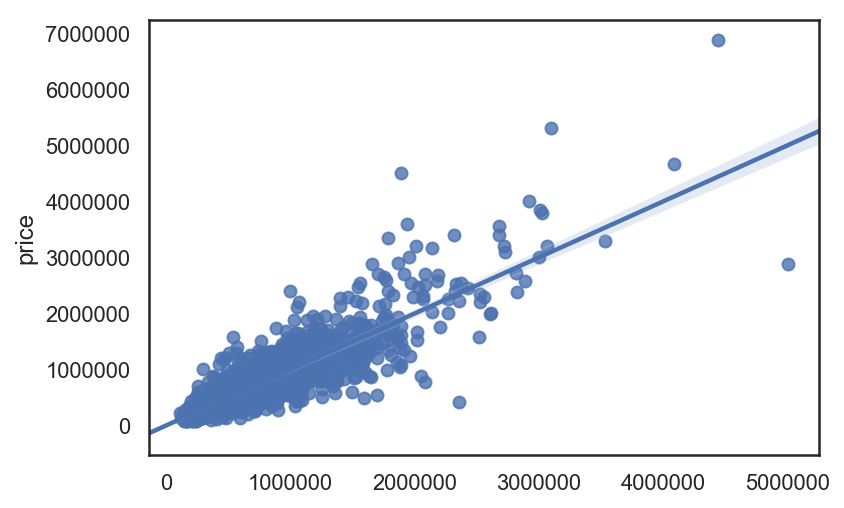

In [66]:
random_forest(X_train,y_train,X_test,y_test)

With the random forest regressor we managed to push the RMSE down to 169716! Much better than the baseline and quite an improvement over the linear regression.

Let's try and see if we can get better insights into the influence of each feature on the price.

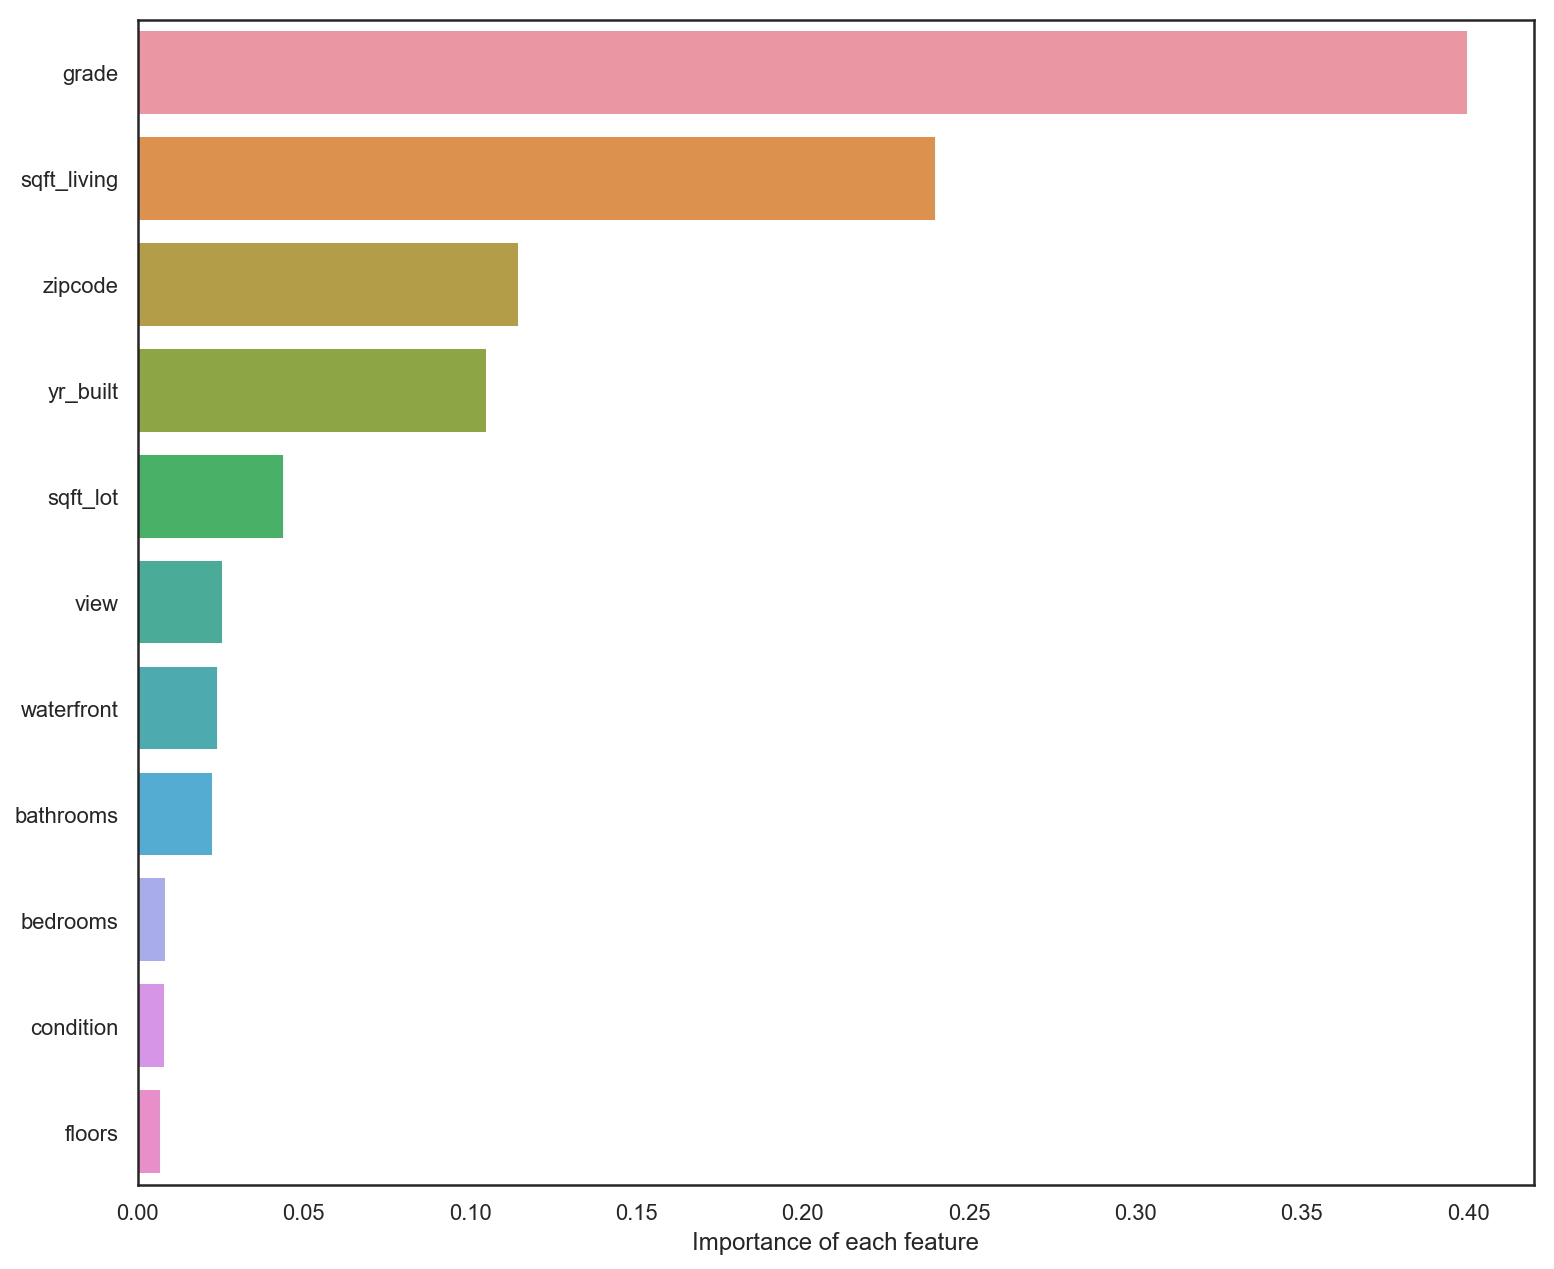

In [67]:
rf = RandomForestRegressor(max_depth=20)
rf.fit(X_train,y_train)
ranking = np.argsort(-rf.feature_importances_[:15])
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("Importance of each feature")
plt.tight_layout()
plt.show()

Through this barplot we can see that grade, living space and location are the three features that influence price the most.

---

### Conclusion

We used two different methods to beat the baseline RMSE of 380043.

Method I: Linear regression yielded an RMSE of 217888.
Method II: Random Forest Regressor yielded an RMSE of 166451.

Method II largely outperformed the baseline. We can therefore predict the price of a house with a 166451 USD margin of error.